In [1]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
#import sklearn.datasets
import cv2 as cv
import glob

import os



In [2]:
# funciones para segmentar color y buscar el centroide
def seg_color(src,bajos, altos):
    mask = cv.inRange(src, bajos, altos)
    return mask
        
def buscar_centroide(mask):

    moments = cv.moments(mask)
    area=moments['m00']
    
    x = int(moments['m10']/moments['m00'])
    y = int(moments['m01']/moments['m00'])
    
    # put text and highlight the center

    #cv.circle(mask, (x, y), 5, (0, 0, 0), -1)

    #cv.putText(mask, "centroid", (x - 25, y - 25),cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    cv.rectangle(mask,(x,y),(x+2, y+2),(0,0,0),2)#poner un punto en el centroide
    
    
    return mask,x,y

def radio_obstaculo(src,factor=1):
    #gray = cv.cvtColor(EspacioMin, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(src, (7, 7), 3)

    t, dst = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_TRIANGLE)

    contours,_  = cv.findContours(dst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

    for c in contours:
        area = cv.contourArea(c)
        if area > 200 and area < 1000000:
            (x, y, w, h) = cv.boundingRect(c)
                                
            x=round(x - ((w*factor)/2) + (w/2))
            y=round(y - ((h*factor)/2) + (h/2))
            w = w*factor
            h = h*factor
            
            cv.rectangle(src, (x, y), (x + w, y + h), (255), 1, cv.LINE_AA)
            
    plt.figure(figsize=(12,12))
    plt.imshow(src, cmap='viridis')
    # cv.imshow('contornos', EspacioMin)
    # cv.imshow('umbral', dst)
    if (w) >= (h):
        radio = abs(w/2)*factor
        return round(radio)
    else:
        radio = abs(h/2)*factor
        return round(radio)
        
    
    # cv.waitKey(0)
    
def dibujarObs(mask,x,y,radio):
    mask=np.zeros((mask.shape[0],mask.shape[1]),dtype=np.uint8)
    #Dibujando un círculos
    cv.circle(mask,(x,y),radio,(150),-1)
    
    plt.figure(figsize=(12,12))
    plt.imshow(mask, cmap='viridis')

In [3]:
#rangos de rojo que queremos segmentar 
rojo_bajos = np.array([0,0,80], dtype=np.uint8)
rojo_altos = np.array([240, 122, 255], dtype=np.uint8)


In [4]:
#leyendo imagen de robo dk y tomando la posicion del centroide,
#estas coordenadas van a ser utiles para calcular la constante de la camara

src=cv.imread('Frame_3-Snapshot.png')

src_np= np.array((src))
print(src_np.shape)
maskRojo=seg_color(src, rojo_bajos, rojo_altos) 
print(maskRojo.shape)
maskRojo,xRojo,yRojo=buscar_centroide(maskRojo) 


print(xRojo,yRojo)
cv.imshow('camara',src)
cv.imshow('Rojo', maskRojo)
cv.waitKey(0)
cv.destroyAllWindows()

(480, 640, 3)
(480, 640)


ZeroDivisionError: float division by zero

In [5]:
img_example = cv.imread('Frame_3-Snapshot.png')
#img_example = np.argmax(img_example,axis=-1)
# img_example[img_example==1]=30
# img_example[img_example==2]=60
# img_example[img_example==3]=90
# img_example[img_example==4]=120
# img_example[img_example==5]=150
# img_example[img_example==6]=180
# img_example[img_example==7]=210
# img_example[img_example==8]=240

In [6]:
print(np.unique(img_example[:,:,2]))#toda la informacion esta en el tercer canal
print(img_example.shape)

[0 1 2 3 4 5 6 7 8]
(480, 640, 3)


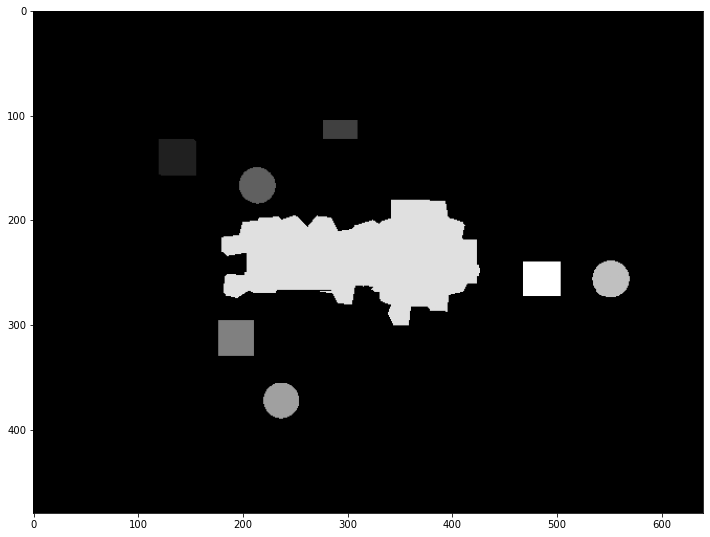

In [7]:
plt.figure(figsize=(12,12))
plt.imshow(img_example[:,:,2], cmap='gray')

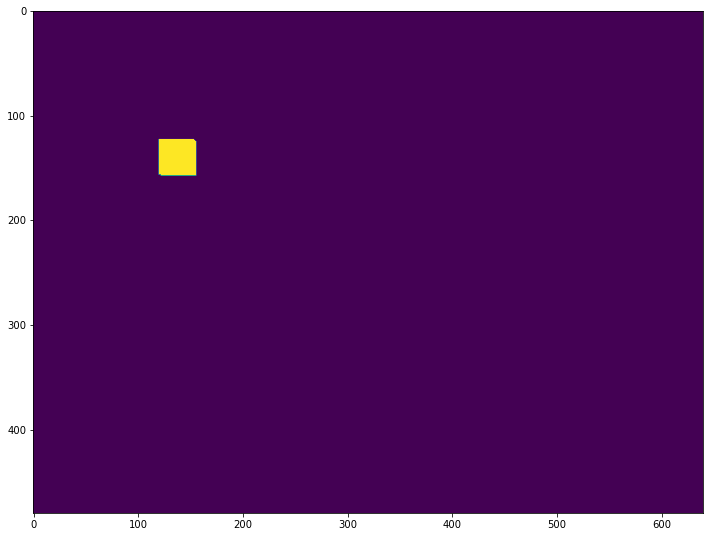

In [8]:
inicio = np.array([0,0,1], dtype=np.uint8)
maskInicio = seg_color(img_example, inicio, inicio)
plt.figure(figsize=(12,12))
plt.imshow(maskInicio, cmap='viridis')

(480, 640)


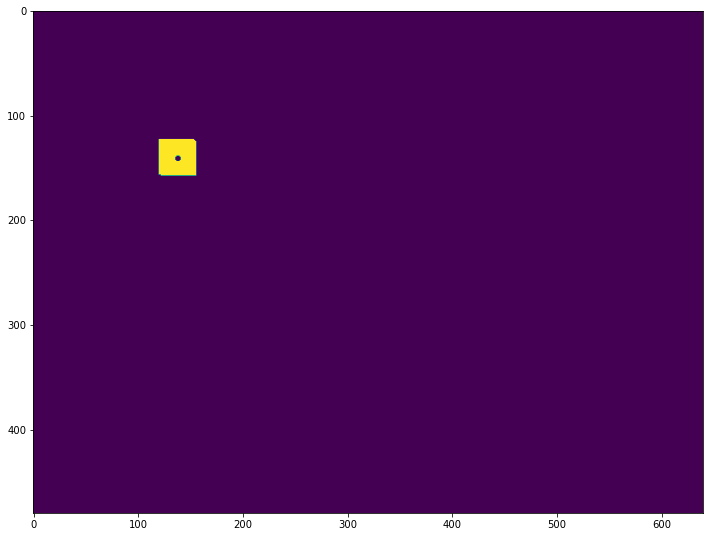

In [9]:
maskInicio,xInicio,yInicio=buscar_centroide(maskInicio) 
plt.figure(figsize=(12,12))
plt.imshow(maskInicio, cmap='viridis')
print(maskInicio.shape)



(480, 640)


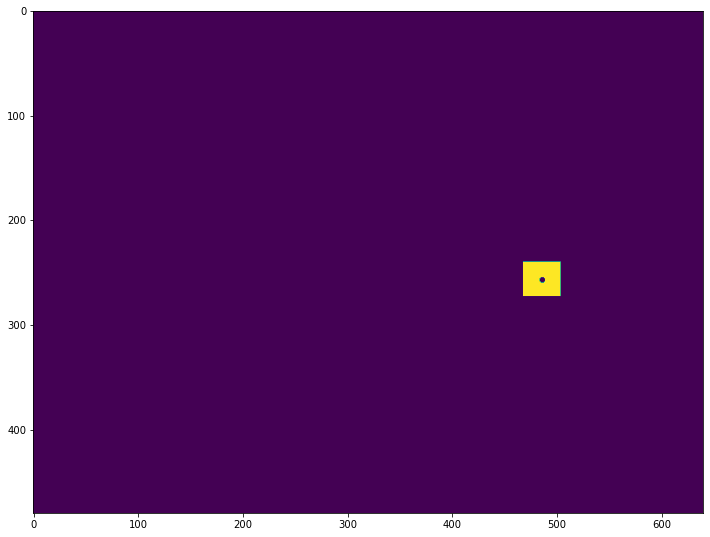

In [10]:
final = np.array([0,0,8], dtype=np.uint8)
maskFinal = seg_color(img_example, final, final)
# plt.figure(figsize=(12,12))
# plt.imshow(maskFinal, cmap='viridis')
maskFinal,xFinal,yFinal=buscar_centroide(maskFinal) 
plt.figure(figsize=(12,12))
plt.imshow(maskFinal, cmap='viridis')
print(maskFinal.shape)


(480, 640)
20


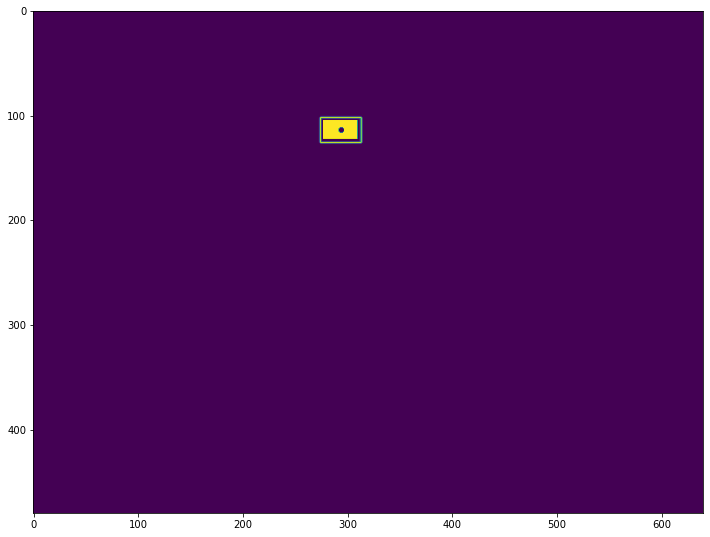

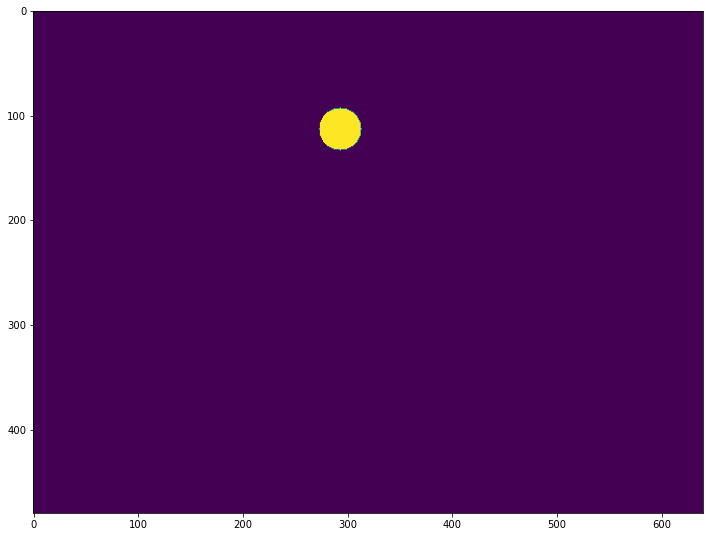

In [11]:
obs1 = np.array([0,0,2], dtype=np.uint8)
maskObs1 = seg_color(img_example, obs1, obs1)
maskObs1,xObs1,yObs1=buscar_centroide(maskObs1) 
#plt.figure(figsize=(12,12))
#plt.imshow(maskObs1, cmap='viridis')
print(maskObs1.shape)



radObs1=radio_obstaculo(maskObs1,factor=1)
print(radObs1)

dibujarObs(maskObs1,xObs1,yObs1,radObs1)

(480, 640)
20
213 166


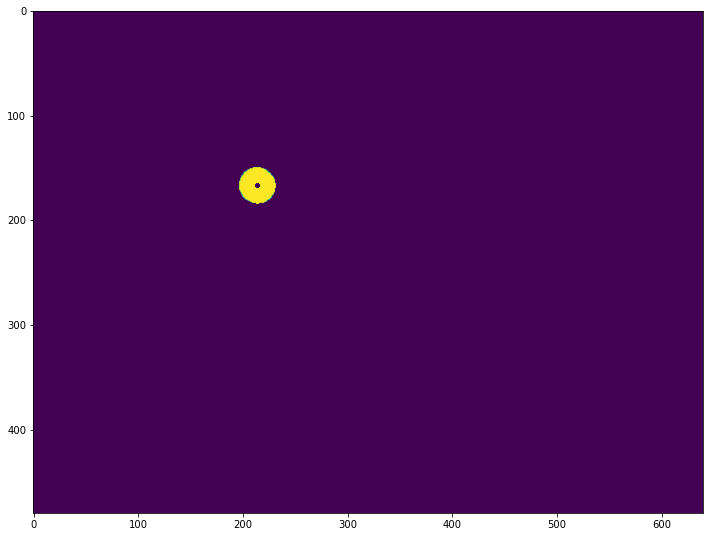

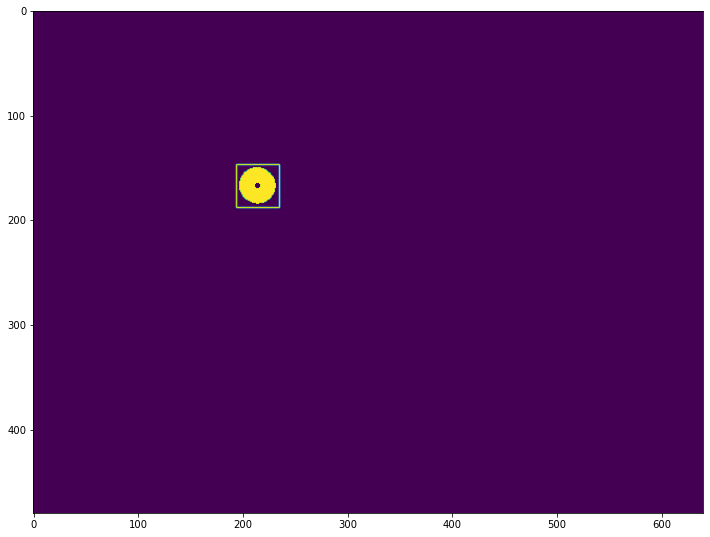

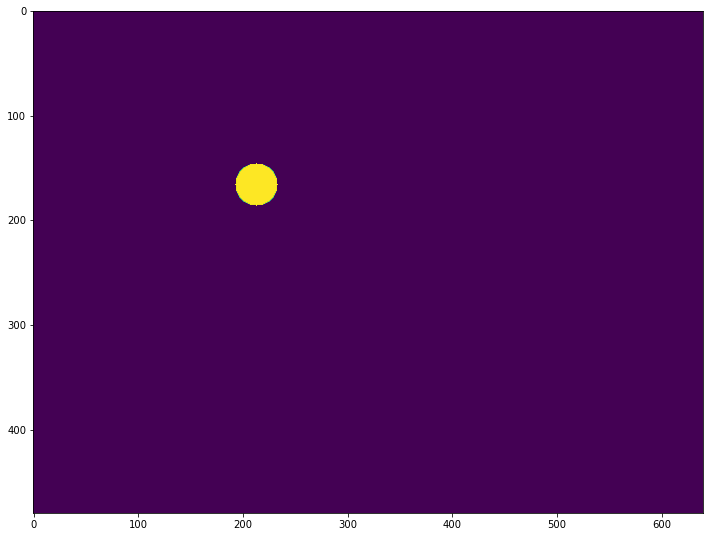

In [12]:
obs2 = np.array([0,0,3], dtype=np.uint8)
maskObs2 = seg_color(img_example, obs2, obs2)
maskObs2,xObs2,yObs2=buscar_centroide(maskObs2) 
plt.figure(figsize=(12,12))
plt.imshow(maskObs2, cmap='viridis')
print(maskObs2.shape)

radObs2=radio_obstaculo(maskObs2,factor=1)
print(radObs2)
print(xObs2,yObs2)
dibujarObs(maskObs2,xObs2,yObs2,radObs2)

(480, 640)
20


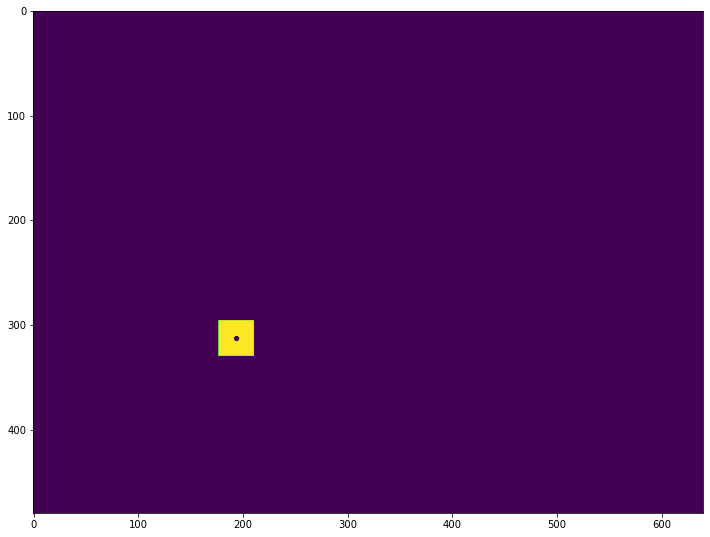

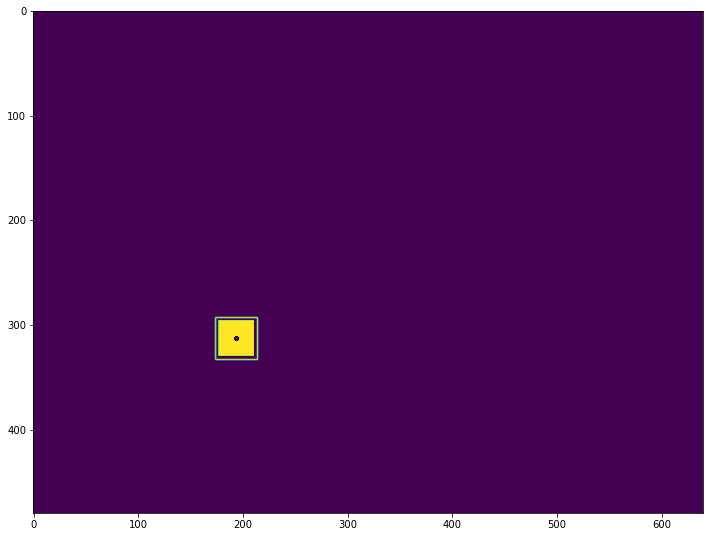

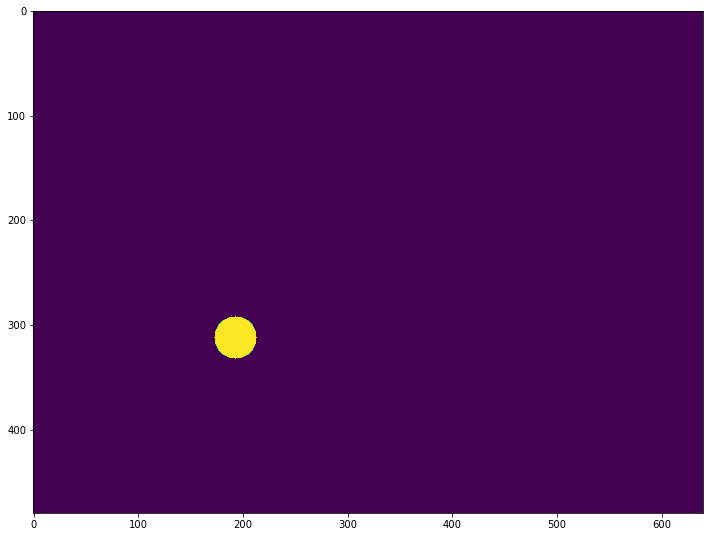

In [13]:
obs3 = np.array([0,0,4], dtype=np.uint8)
maskObs3 = seg_color(img_example, obs3, obs3)
maskObs3,xObs3,yObs3=buscar_centroide(maskObs3) 
plt.figure(figsize=(12,12))
plt.imshow(maskObs3, cmap='viridis')
print(maskObs3.shape)

radObs3=radio_obstaculo(maskObs3,factor=1)
print(radObs3)

dibujarObs(maskObs3,xObs3,yObs3,radObs3)

(480, 640)
20


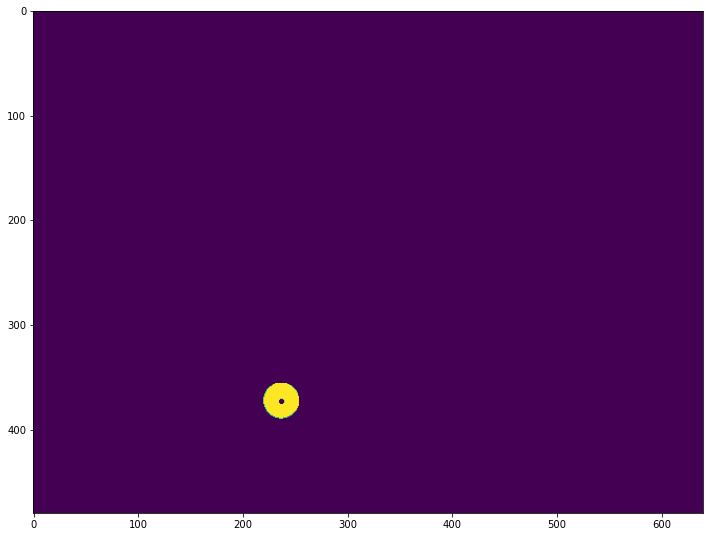

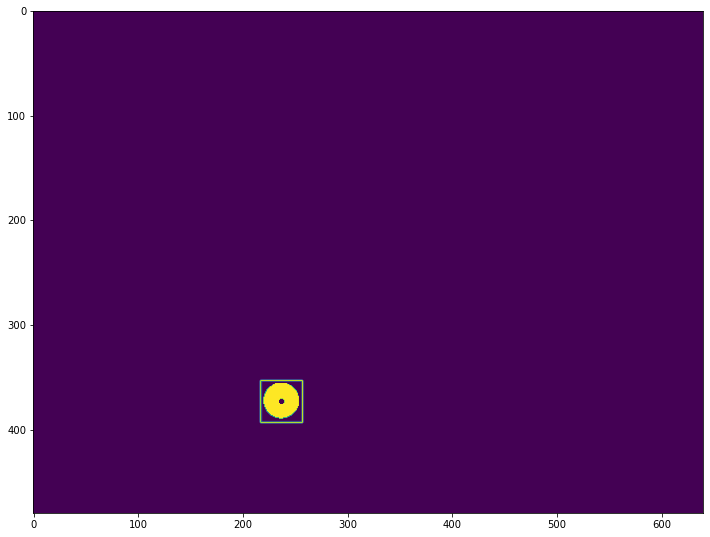

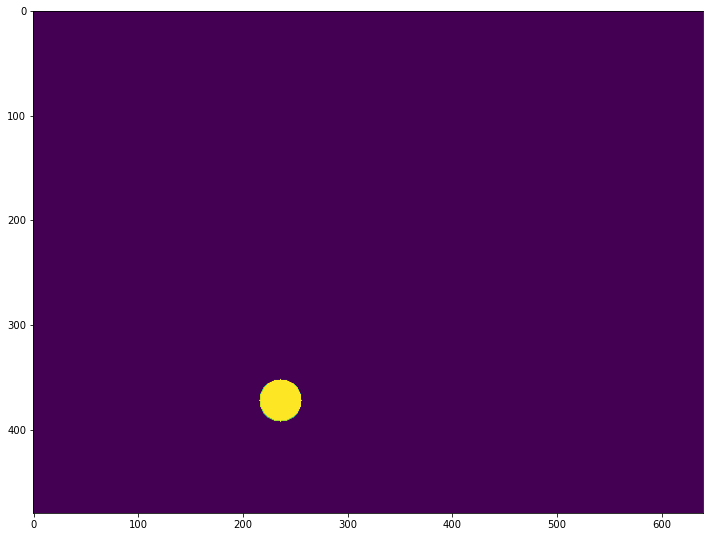

In [14]:
obs4 = np.array([0,0,5], dtype=np.uint8)
maskObs4 = seg_color(img_example, obs4, obs4)
maskObs4,xObs4,yObs4=buscar_centroide(maskObs4) 
plt.figure(figsize=(12,12))
plt.imshow(maskObs4, cmap='viridis')
print(maskObs4.shape)

radObs4=radio_obstaculo(maskObs4,factor=1)
print(radObs4)

dibujarObs(maskObs4,xObs4,yObs4,radObs4)

(480, 640)
21


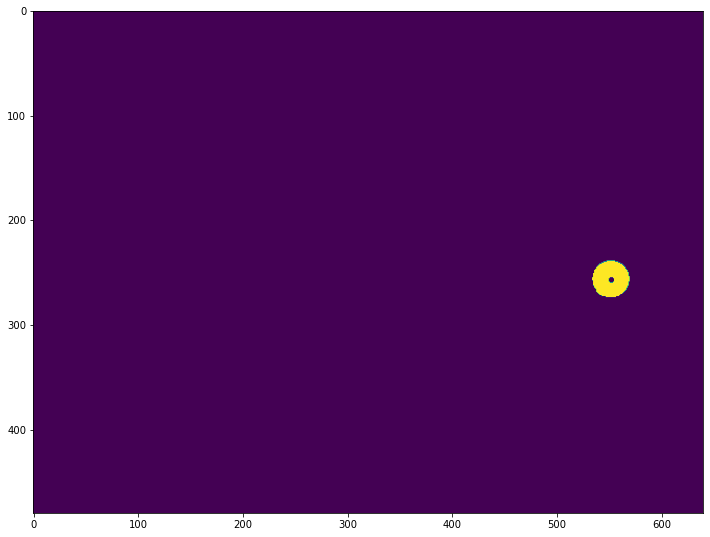

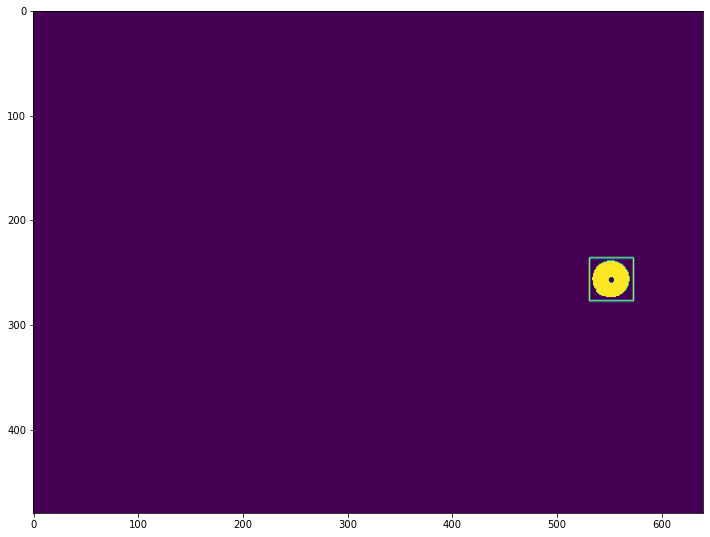

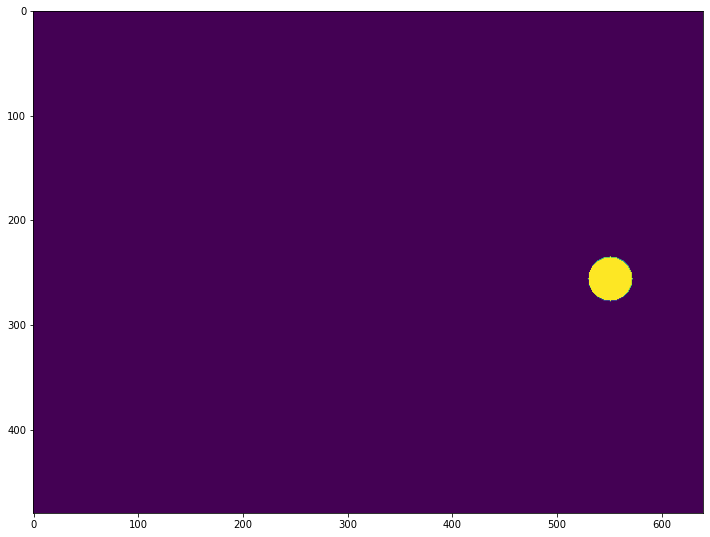

In [15]:
obs5 = np.array([0,0,6], dtype=np.uint8)
maskObs5 = seg_color(img_example, obs5, obs5)
maskObs5,xObs5,yObs5=buscar_centroide(maskObs5) 
plt.figure(figsize=(12,12))
plt.imshow(maskObs5, cmap='viridis')
print(maskObs5.shape)

radObs5=radio_obstaculo(maskObs5,factor=1)
print(radObs5)

dibujarObs(maskObs5,xObs5,yObs5,radObs5)

(480, 640)


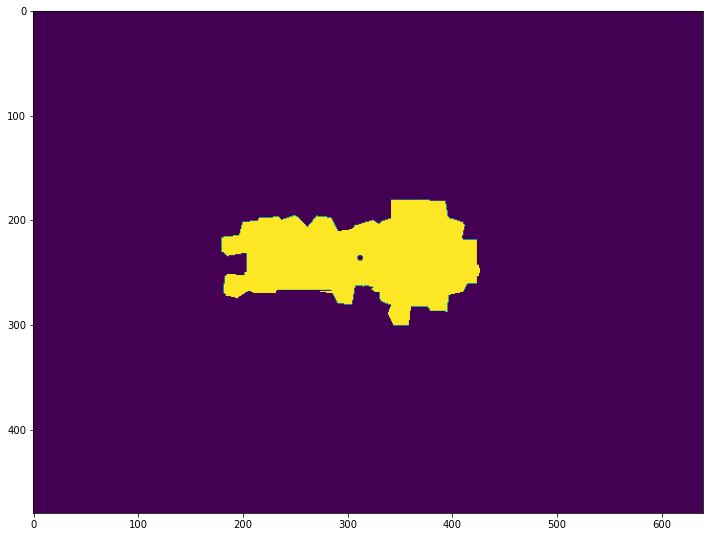

In [16]:
obs6 = np.array([0,0,7], dtype=np.uint8)
maskObs6 = seg_color(img_example, obs6, obs6)
maskObs6,xObs6,yObs6=buscar_centroide(maskObs6) 
plt.figure(figsize=(12,12))
plt.imshow(maskObs6, cmap='viridis')
print(maskObs6.shape)

20


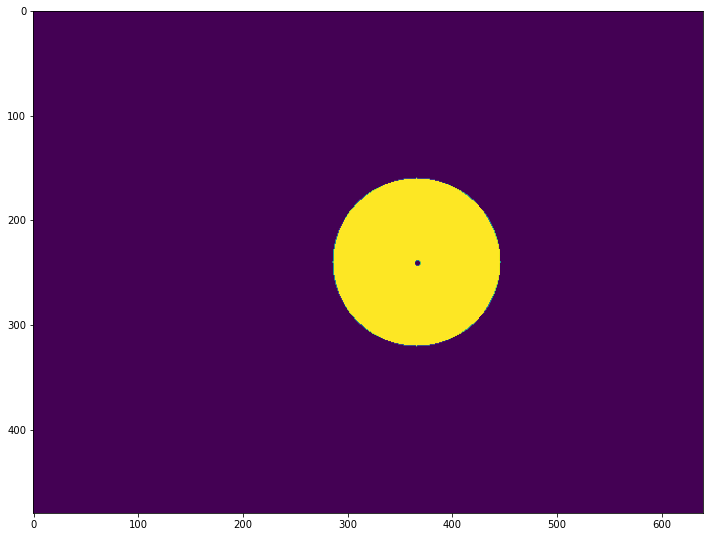

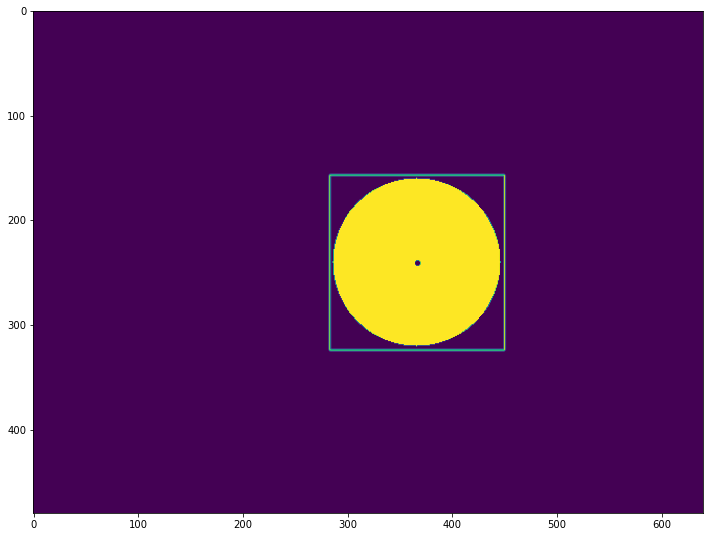

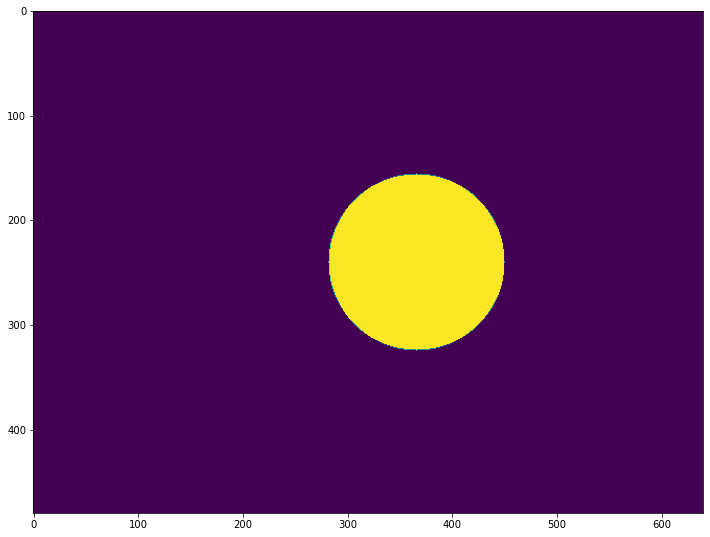

In [17]:
EspacioMin = 255*np.ones((400,600),dtype=np.uint8)
EspacioMin = maskObs6
#Dibujando un círculos
cv.circle(EspacioMin,(xObs6+55,yObs6+5),80,(150),-1)
EspacioMin = seg_color(EspacioMin, 150, 150)
EspacioMin,xEspacioMin,yEspacioMin=buscar_centroide(EspacioMin) 
#cv.circle(imagen,(300,20),10,(0),3)

plt.figure(figsize=(12,12))
plt.imshow(EspacioMin, cmap='viridis')

radEspacioMin=radio_obstaculo(EspacioMin,factor=1)
print(radObs1)

dibujarObs(EspacioMin,xEspacioMin,yEspacioMin,radEspacioMin)



In [18]:
# #gray = cv.cvtColor(EspacioMin, cv.COLOR_BGR2GRAY)
# gray = cv.GaussianBlur(EspacioMin, (7, 7), 3)

# t, dst = cv.threshold(gray, 0, 255, cv.THRESH_BINARY | cv.THRESH_TRIANGLE)

# contours,_  = cv.findContours(dst, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# for c in contours:
#     area = cv.contourArea(c)
#     if area > 2000 and area < 1000000:
#         (x, y, w, h) = cv.boundingRect(c)
#         cv.rectangle(EspacioMin, (x, y), (x + w, y + h), (255), 1, cv.LINE_AA)
# # cv.imshow('contornos', EspacioMin)
# # cv.imshow('umbral', dst)
# plt.figure(figsize=(12,12))
# plt.imshow(EspacioMin, cmap='viridis')
# # cv.waitKey(0)

(480, 640)
21


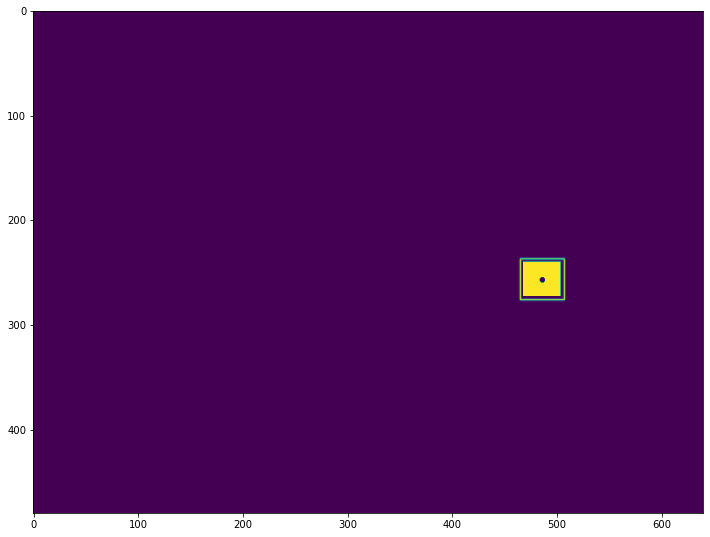

In [19]:
final = np.array([0,0,8], dtype=np.uint8)
maskFinal = seg_color(img_example, final, final)
maskFinal,xFinal,yFinal=buscar_centroide(maskFinal) 
#plt.figure(figsize=(12,12))
#plt.imshow(maskFinal, cmap='viridis')
print(maskFinal.shape)
###agregando radio o area
radioFinal=radio_obstaculo(src = maskFinal,factor=1)
print(radioFinal)

In [20]:
from numpy import array
from numpy import savetxt

punto_inicio = np.array([xInicio,yInicio])
print(punto_inicio,'\n')
savetxt('punto_inicio.csv', punto_inicio, delimiter=',')
punto_final = np.array([xFinal,yFinal])
print(punto_final,'\n')
savetxt('punto_final.csv', punto_final, delimiter=',')

[137 140] 

[485 256] 



In [21]:
obstaculos = np.array(([xEspacioMin,yEspacioMin,radEspacioMin],
                    [xObs1,yObs1,radObs1],
                     [xObs2,yObs2,radObs2],
                     [xObs3,yObs3,radObs3],
                     [xObs4,yObs4,radObs4],
                     [xObs5,yObs5,radObs5]
                    ))
print(obstaculos)
savetxt('obstaculos.csv', obstaculos, delimiter=',')

[[366 240  84]
 [293 113  20]
 [213 166  20]
 [193 312  20]
 [236 372  20]
 [551 256  21]]
